### Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import re

In [3]:
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [4]:
df=pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [7]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,house,independent,sector 41,9.0,27778.0,3240.0,Plot area 360(301.01 sq.m.),8,5,3+,"store room,pooja room,servant room",3 Floors,NaN,10+ Year Old,"['Huda city centre metro station', 'Axis bank ATM', 'Hdfc ATM', 'Axis bank ATM', 'Citi bank ATM', 'Icici ATM', 'Punjab national bank ATM', 'Hdfc bank ATM', 'Standard chartered ATM', 'Centre For Sight Gurgaon Sector 29', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Dr. Kutbuddin Akbary', 'Max Hospital', 'Shivam Hospital Gurgaon', 'Gardian Pharmacy', 'City Medical', 'Bharat petroleum', 'Hdfc bank', 'Icici bank', 'Beer & Whisky Bar', 'MoB Ministory of Beer', ""McDonald's"", 'Park Baluchi', ""Domino's Pizza"", 'Zura', 'The Oriental Bloom Chinese and Thai', 'Gola Sizzles', ""Hops 'N' Brew"", 'Pizza Hut', 'Spaghetti Kitchen & Bar', 'Bikanervala', 'Tocpao', 'PWO house', 'Black Mambaa', 'Gravity Space Bar', 'Roots', 'KFC', 'Ardor 29', 'ADDA', 'Gung the palace Korean restaurant', 'Walking Street', 'distillery', 'Swagath', 'Dhabba', 'Pizza Hut', 'Balaji Vegetarian Paradise', 'School of Inspired Leadership SOIL', 'Ncr library']","['5 Wardrobe', '1 Exhaust Fan', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'High Ceiling Height', 'False Ceiling Lighting', 'Visitor Parking', 'Waste Disposal']"


In [8]:
df.duplicated().sum()

np.int64(121)

In [10]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
3006,18.00,4518.0,Plot area 502(419.74 sq.m.)
2860,0.95,1067.0,Super Built up area 1067(99.13 sq.m.)Carpet area: 578 sq.ft. (53.7 sq.m.)
2270,0.27,621.0,Built Up area: 619 (57.51 sq.m.)
930,1.10,1457.0,Super Built up area 1457(135.36 sq.m.)
1768,1.75,1970.0,Super Built up area 1970(183.02 sq.m.)


In [11]:
# function to extract the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)',text)
    if match:
        return float(match.group(1))
    return None

In [12]:
# This function extracts the built up area or carpet area
def get_area(text,area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)',text)
    if match:
        return float(match.group(1))
    return None

In [13]:
# This function checks if the area is provided in sq.m and converts it to sqft if needed
def convert_to_sqft(text,area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value),text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639 # conversion factor from sq.m. to sqft
    return area_value
        

In [14]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [15]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
463,1.42,flat,1830.0,Super Built up area 1920(178.37 sq.m.),1920.0,NaN,NaN
2034,0.80,flat,1519.0,Carpet area: 1519 (141.12 sq.m.),NaN,NaN,1519.0
3117,4.75,house,1650.0,Plot area 1600(148.64 sq.m.)Built Up area: 1700 sq.ft. (157.94 sq.m.)Carpet area: 1650 sq.ft. (153.29 sq.m.),NaN,1700.0,1650.0
1881,4.80,flat,3270.0,Built Up area: 2895 (268.95 sq.m.),NaN,2895.0,NaN
147,NaN,house,NaN,Built Up area: 5000 (464.52 sq.m.),NaN,5000.0,NaN


In [16]:
df.duplicated().sum()

np.int64(121)

In [17]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [18]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,9.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
2,8.45,house,359.0,Plot area 359(33.35 sq.m.),NaN,NaN,NaN
5,6.25,house,9001.0,Plot area 1000(836.13 sq.m.),NaN,NaN,NaN
7,3.60,house,1449.0,Plot area 161(134.62 sq.m.),NaN,NaN,NaN
9,0.55,house,1350.0,Plot area 1350(125.42 sq.m.),NaN,NaN,NaN


In [19]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [20]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [21]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,9.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
2,8.45,house,359.0,Plot area 359(33.35 sq.m.),NaN,NaN,NaN
5,6.25,house,9001.0,Plot area 1000(836.13 sq.m.),NaN,NaN,NaN
7,3.60,house,1449.0,Plot area 161(134.62 sq.m.),NaN,NaN,NaN
9,0.55,house,1350.0,Plot area 1350(125.42 sq.m.),NaN,NaN,NaN


In [22]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [23]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [24]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [25]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,9.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
2,8.45,house,359.0,Plot area 359(33.35 sq.m.),NaN,359.00,NaN
5,6.25,house,9001.0,Plot area 1000(836.13 sq.m.),NaN,1000.00,NaN
7,3.60,house,1449.0,Plot area 161(134.62 sq.m.),NaN,161.00,NaN
9,0.55,house,1350.0,Plot area 1350(125.42 sq.m.),NaN,1350.00,NaN
18,6.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,200.00,NaN
20,3.51,house,2844.0,Plot area 316(264.22 sq.m.),NaN,316.00,NaN
22,4.00,house,2400.0,Plot area 2400(222.97 sq.m.),NaN,2400.00,NaN
27,8.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
46,10.50,house,402.0,Plot area 402(37.35 sq.m.),NaN,402.00,NaN


In [26]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']
            

In [27]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [28]:
# update the original dataframe
df.update(all_nan_df)

In [29]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

# 2. Additional Room

In [30]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,

In [31]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [32]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
1440,"servant room,pooja room",0,1,0,1,0
2066,"pooja room,study room,servant room,store room",1,1,1,1,0
2246,not available,0,0,0,0,0
2795,"pooja room,study room,servant room,store room",1,1,1,1,0
187,not available,0,0,0,0,0


# 3. agePossession

In [33]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Jan 2024                 8
Oct 2024                 8
Dec 2025                 7
Jun 2024                 7
Aug 2023                 7
Nov 2023                 5
Oct 2023                 4
Jul 2024                 4
By 2025                  4
Aug 2024                 4
Sep 2023                 4
Feb 2024                 3
May 2024                 3
Nov 2024                 3
Jan 2025                 3
Jun 2027                 2
Jan 2026                 2
Jul 2025                 2
Mar 2025                 2
Dec 2026                 2
Oct 2025                 2
Sep 2025                 2
Apr 2026                 2
Jul 2027      

In [34]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [35]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [36]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

# 4. furnishDetails

In [37]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
2530,NaN,['Park']
2280,NaN,NaN
1687,"['7 Wardrobe', '1 Water Purifier', '6 Fan', '1 Exhaust Fan', '6 Geyser', '1 Washing Machine', '14 Light', '6 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2255,"['1 Wardrobe', '3 Fan', '1 Exhaust Fan', '5 Light', '1 Chimney', '1 Curtains', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Swimming Pool', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']"
1009,[],"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Piped-gas', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [39]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(rf"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0


In [40]:
# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [41]:
furnishings_df.shape

(3803, 19)

In [42]:
furnishings_df.drop(columns =['furnishDetails'],inplace = True)

C:\Users\varun\AppData\Local\Temp\ipykernel_4408\2076178588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns =['furnishDetails'],inplace = True)


In [43]:
furnishings_df.sample(5)


,Fridge,Stove,Washing Machine,Fan,Sofa,Exhaust Fan,Chimney,Bed,Curtains,AC,TV,Water Purifier,Dining Table,Modular Kitchen,Wardrobe,Geyser,Light,Microwave
2190,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,6,0
1023,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,2,0
3530,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
!pip install scikit-learn


  Using cached scikit_learn-1.7.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.16.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp312-cp312-win_amd64.whl (8.7 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached scipy-1.16.3-cp312-cp312-win_amd64.whl (38.6 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [47]:

scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [48]:

wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

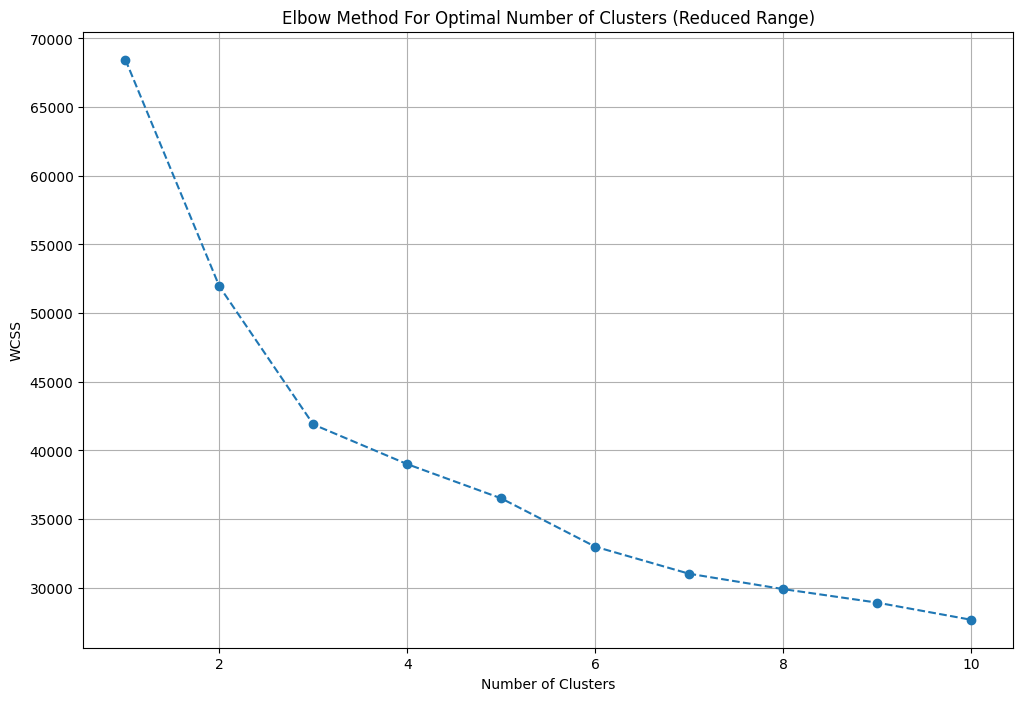

In [49]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [50]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [51]:

df = df.iloc[:,:-18]

In [52]:

df['furnishing_type'] = cluster_assignments

In [53]:

df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
3701,NaN,0
1418,"['22 Wardrobe', '8 Fan', '1 Exhaust Fan', '6 Geyser', '1 Stove', '28 Light', '7 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']",1
298,"['1 Exhaust Fan', '1 Chimney', '1 Modular Kitchen', '3 Wardrobe', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",1
3492,NaN,0
1543,"['3 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0


# 5. features

In [54]:

df[['society','features']].sample(5)

,society,features
2426,imperia the esfera,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
1406,vipul lavanya,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
1694,signature global city 81,NaN
3502,shapoorji pallonji joyville gurugram,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']"
1954,silverglades the melia,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Piped-gas', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"


In [55]:

df['features'].isnull().sum()

np.int64(635)

In [57]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [58]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [59]:
temp_df = df[df['features'].isnull()]

In [60]:
temp_df.shape

(635, 26)

In [61]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [62]:
df.loc[temp_df.index,'features'] = x.values

In [63]:
df['features'].isnull().sum()

np.int64(481)

In [64]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [65]:

# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [66]:

features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2205,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
2520,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
276,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
486,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
604,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:

features_binary_df.shape

(3803, 130)

In [68]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

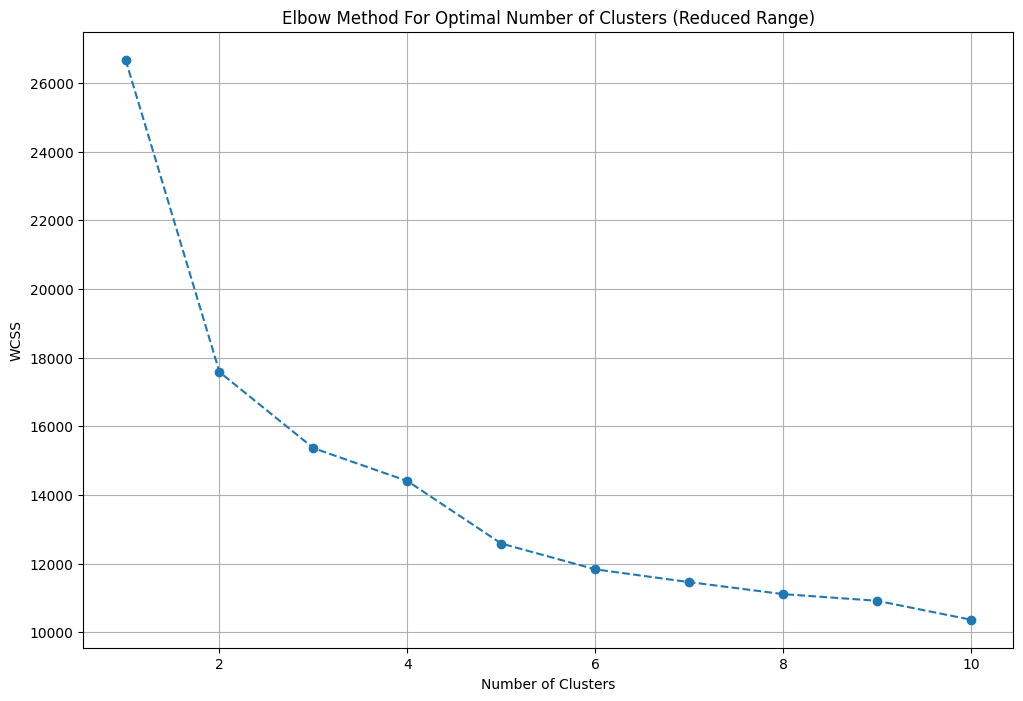

In [69]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [70]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [71]:
df['luxury_score'] = luxury_score

In [72]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,house,independent,sector 41,9.00,27778.0,3240.0,Plot area 360(301.01 sq.m.),8,5,3+,"store room,pooja room,servant room",3 Floors,NaN,Old Property,"['Huda city centre metro station', 'Axis bank ATM', 'Hdfc ATM', 'Axis bank ATM', 'Citi bank ATM', 'Icici ATM', 'Punjab national bank ATM', 'Hdfc bank ATM', 'Standard chartered ATM', 'Centre For Sight Gurgaon Sector 29', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Dr. Kutbuddin Akbary', 'Max Hospital', 'Shivam Hospital Gurgaon', 'Gardian Pharmacy', 'City Medical', 'Bharat petroleum', 'Hdfc bank', 'Icici bank', 'Beer & Whisky Bar', 'MoB Ministory of Beer', ""McDonald's"", 'Park Baluchi', ""Domino's Pizza"", 'Zura', 'The Oriental Bloom Chinese and Thai', 'Gola Sizzles', ""Hops 'N' Brew"", 'Pizza Hut', 'Spaghetti Kitchen & Bar', 'Bikanervala', 'Tocpao', 'PWO house', 'Black Mambaa', 'Gravity Space Bar', 'Roots', 'KFC', 'Ardor 29', 'ADDA', 'Gung the palace Korean restaurant', 'Walking Street', 'distillery', 'Swagath', 'Dhabba', 'Pizza Hut', 'Balaji Vegetarian Paradise', 'School of Inspired Leadership SOIL', 'Ncr library']","['5 Wardrobe', '1 Exhaust Fan', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'High Ceiling Height', 'False Ceiling Lighting', 'Visitor Parking', 'Waste Disposal']",NaN,3240.0,NaN,0,1,1,1,0,1,"[Feng Shui / Vaastu Compliant, High Ceiling Height, False Ceiling Lighting, Visitor Parking, Waste Disposal]",26
1,flat,aipl the peaceful homes,sector 70a,1.60,9584.0,1669.0,Super Built up area 1565(145.39 sq.m.),2,2,2,not available,22.0,North,Moderately Old,"['Airia Mall', 'Golf Corse Ext. Rd.', 'National Highway-48', 'Indus World School', 'Gurugram University', 'Ananta Hospital', 'Indira Gandhi International Airport', 'DLF Corporate Greens', 'IMT Manesar', 'Hyatt Regency Gurgaon', 'SkyJumper Trampoline Park']","['4 Fan', '1 Exhaust Fan', '2 Geyser', '11 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1565.0,NaN,NaN,0,0,0,0,0,0,"[Security / Fire Alarm, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Piped-gas, Visitor Parking, Swimming Pool, Park, Internet/wi-fi connectivity, Shopping Centre, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center, Water softening plant]",86
2,house,unitech deerwood chase,sector 50,8.45,235376.0,359.0,Plot area 359(33.35 sq.m.),3,3,2,"study room,servant room",2 Floors,North-East,Old Property,"['Sector 55-56 Metro Station', 'Raheja Mall', 'Basant Valley Global School', 'Park Hospital']","['5 Fan', '1 Exhaust Fan', '6 Geyser', '1 Stove', '10 Light', '6 AC', '1 Modular Kitchen', '1 Chimney', '4 Wardrobe', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entr